# Projet n°3 : Concevez une application au service de la santé publique

## Import des librairies

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import du jeux de données

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', nrows=10, sep='\t')

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(10, 183)

En m'appuyant sur mon idée d'application, je sélectionne différentes variables :
- macro-nutriments
- micro-nutriments
- energy et qualité nutritionnelle
- informations diverses sur le produit

In [5]:
 columns = ['code',           
'product_name',
            
'brands',
'brands_tags',
            
'categories',
'categories_tags',
'main_category',
'ingredients_text',
'traces_tags',

            
'labels',
'labels_tags',
           
'origins',
'origins_tags',
            
'countries',
'countries_tags',
            
'purchase_places',
'cities',
            
'emb_codes',
'emb_codes_tags',
          
'nutrition-score-fr_100g',
'nutriscore_grade',
'nutriscore_score',
'energy_100g',
'energy-kcal_100g',
'fat_100g',
           'saturated-fat_100g',
           'polyunsaturated-fat_100g',
           'monounsaturated-fat_100g',
           'trans-fat_100g',
'omega-3-fat_100g',
'potassium_100g',
'sodium_100g',
'carbohydrates_100g',
           'sugars_100g',
           'fiber_100g',
'proteins_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g'
]

In [6]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', usecols=columns, low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555491 entries, 0 to 1555490
Data columns (total 40 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   code                      1555491 non-null  object 
 1   product_name              1475940 non-null  object 
 2   brands                    855624 non-null   object 
 3   brands_tags               855568 non-null   object 
 4   categories                789900 non-null   object 
 5   categories_tags           789898 non-null   object 
 6   origins                   65893 non-null    object 
 7   origins_tags              65782 non-null    object 
 8   labels                    351083 non-null   object 
 9   labels_tags               351107 non-null   object 
 10  emb_codes                 103382 non-null   object 
 11  emb_codes_tags            103353 non-null   object 
 12  cities                    0 non-null        float64
 13  purchase_places           1

### Choix parmi les doublons des colonnes

In [8]:
df.head(30)

,code,product_name,brands,brands_tags,categories,categories_tags,origins,origins_tags,labels,labels_tags,...,sugars_100g,fiber_100g,proteins_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,7.8,0.5600,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards",NaN,NaN,Delois france,fr:delois-france,...,22.0,0.0,5.1,1.8400,NaN,NaN,NaN,NaN,NaN,18.0
4,00000000001111111111,Sfiudwx,Watt,watt,Xsf,fr:xsf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,NaN,0.2,0.8160,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,2.0,0.4600,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000284,Pain maïs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000291,Mendiants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[['countries', 'countries_tags']].tail(50)

,countries,countries_tags
1555441,en:fr,en:france
1555442,NaN,NaN
1555443,France,en:france
1555444,en:BE,en:belgium
1555445,en:France,en:france
1555446,en:france,en:france
1555447,en:fr,en:france
1555448,France,en:france
1555449,en:ch,en:switzerland
1555450,United States,en:united-states


Les variables avec le suffixe tags sont standardisées. Elle semble donc plus facile à exploiter:
- les catégories peuvent être renseignée en plusieurs langues
- les tags sont soient traduits en anglais, soient ils indiquent la langue, exemple : 'de:tiefkühl-kuchen' 

De plus, le remplissage semble identique à celui de la variable originale.
Pour toutes ces raisons, je décide de garder les variables avec le suffixe tag lorsque j'ai le choix entre deux variables

<AxesSubplot:>

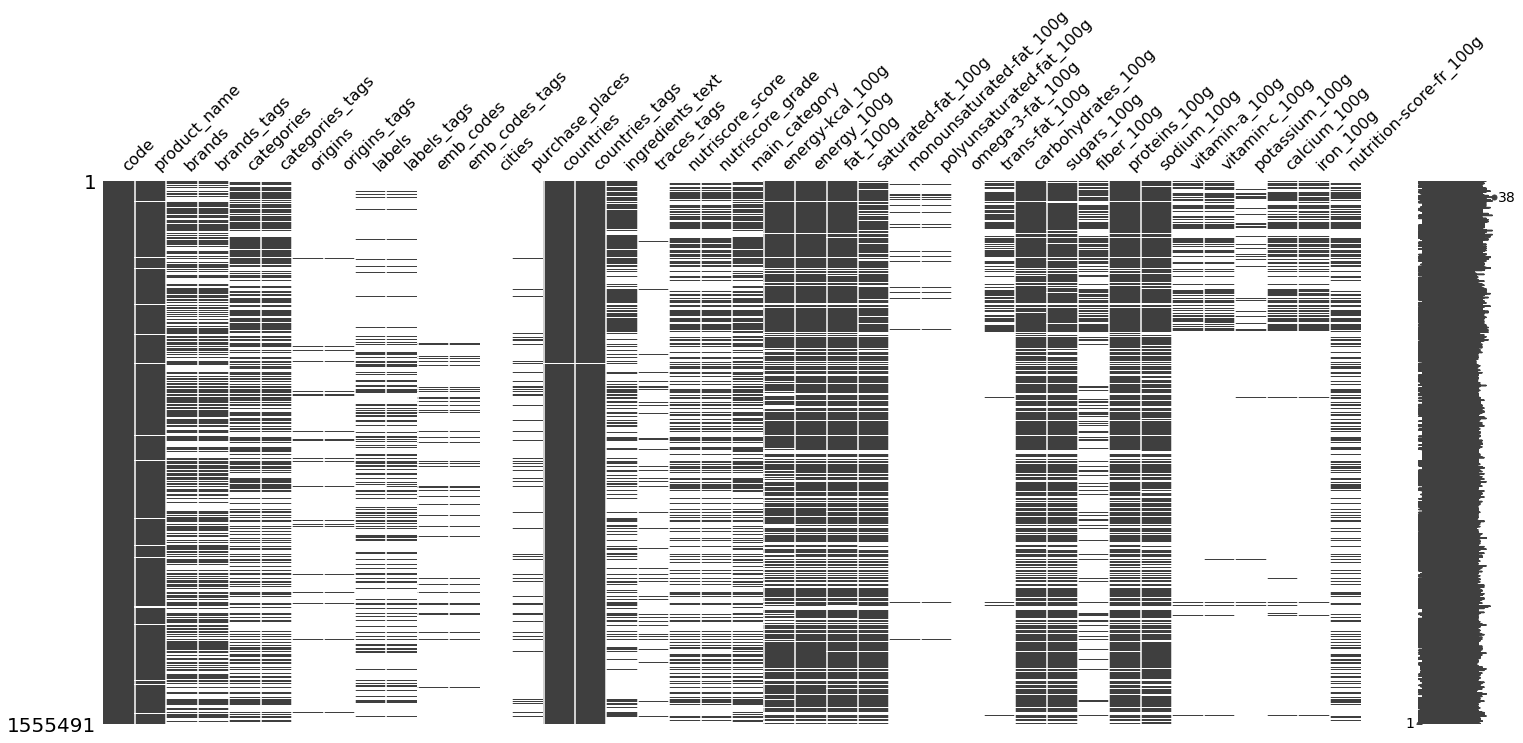

In [10]:
msno.matrix(df)

Autre nettoyage : 
- Je me débarasse également des variables non-nutritionnelles qui ont un taux de remplissage très faible (grapiquement).
- Je garde energy_100g (KJ) à la place de energy_kcal

## Deuxième sélection

In [11]:
columns_v2 = ['code',           
'product_name',        
'brands_tags',
'labels_tags',
'countries_tags',
'main_category',
'ingredients_text',
          
'nutrition-score-fr_100g',
'nutriscore_grade',
'energy_100g',
'fat_100g',
           'saturated-fat_100g',
           'polyunsaturated-fat_100g',
           'monounsaturated-fat_100g',
           'trans-fat_100g',
'omega-3-fat_100g',
'potassium_100g',
'sodium_100g',
'carbohydrates_100g',
           'sugars_100g',
           'fiber_100g',
'proteins_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g'
]

In [12]:
df2 = df[columns_v2]

## Valeurs manquantes

In [13]:
df2 = df2.dropna(subset=['brands_tags',  'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'nutrition-score-fr_100g'], how='all')

print(df2.shape)

(1369970, 26)


In [14]:
df2 = df2.dropna(subset=['fat_100g', 'carbohydrates_100g', 'proteins_100g'], how='any')
print(df2.shape)

(1224751, 26)


<AxesSubplot:>

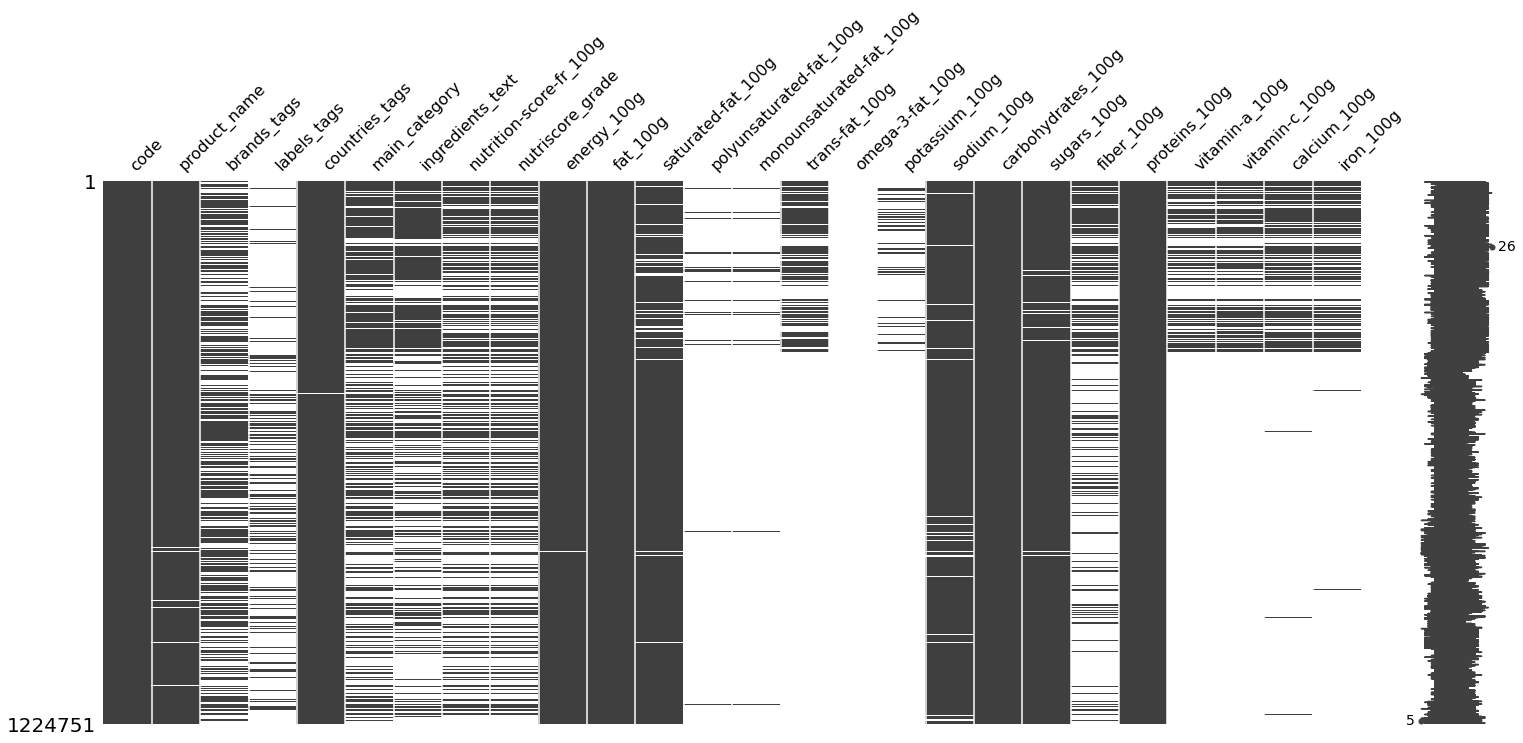

In [15]:
msno.matrix(df2)

In [16]:
print(df2.code.duplicated().sum()) 

df2 = df2.drop_duplicates(subset='code')

6


In [17]:
pd.Series(df2.code).is_unique

True

## Valeurs aberrantes

In [18]:
print(df2.shape)

df2.describe()

(1224745, 26)


,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,trans-fat_100g,omega-3-fat_100g,potassium_100g,sodium_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,615107.000000,1.223441e+06,1.224745e+06,1.174162e+06,46726.000000,46712.000000,263583.000000,1844.000000,90766.000000,1.180890e+06,1.224745e+06,1.200556e+06,449688.000000,1.224745e+06,211238.000000,218523.000000,267457.000000,263185.000000
mean,9.172012,3.535827e+04,1.363729e+01,1.158273e+08,5.830040,9.730230,0.046136,4.263762,0.414915,7.087303e-01,2.839731e+01,1.369370e+01,2.969121,8.512229e+00,0.034986,0.022199,0.164253,0.006324
std,8.901348,3.782685e+07,1.783215e+01,1.255090e+11,10.145116,16.272981,1.052574,23.882163,7.037392,2.981878e+01,2.905694e+01,1.997766e+01,6.268994,1.074177e+01,4.439198,0.654803,4.623530,0.261302
min,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-20.000000,-5.000000e+02,-0.000340,0.000000,0.000000,-0.000260
25%,2.000000,4.310000e+02,7.000000e-01,1.000000e-01,0.000000,0.000015,0.000000,0.421000,0.082000,3.100000e-02,3.570000e+00,7.000000e-01,0.000000,1.200000e+00,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.100000e+03,7.000000e+00,1.900000e+00,2.140000,3.545000,0.000000,1.700000,0.167000,2.290000e-01,1.550000e+01,3.800000e+00,1.600000,5.900000e+00,0.000000,0.000000,0.036000,0.000990
75%,16.000000,1.674000e+03,2.143000e+01,7.200000e+00,6.940000,10.000000,0.000000,3.500000,0.300000,5.600000e-01,5.352000e+01,1.926000e+01,3.600000,1.200000e+01,0.000107,0.004000,0.109000,0.002400
max,40.000000,4.184000e+10,1.500000e+03,1.360000e+14,100.000000,100.000000,369.000000,910.000000,732.000000,2.670000e+04,5.310000e+03,1.350000e+03,2020.000000,2.500000e+03,800.000000,90.000000,930.000000,50.000000


### Maximum

Les variables sont exprimés par 100g. Par conséquent aucune de ces variables de peut être supérieure à 100.

In [19]:
col_num_max = list(df2.describe().columns)
col_num_max.remove('energy_100g')

In [20]:
for x in col_num_max :
    df2.drop(axis=0, index=df2[df2[x] > 100].index, inplace=True)

In [21]:
# la densité d'énergie maximale est de 37 KJ/g (lipide). Par conséquent, aucune variable ne peut avoir un maximum supérieur à 3700

df2.drop(axis=0, index=df2[df2['energy_100g'] > 3700].index, inplace=True )

### Minimum

In [22]:
col_num_min = list(df2.describe().columns)
col_num_min.remove('nutrition-score-fr_100g') # le score min est -15

In [23]:
for x in col_num_min :
    df2.drop(axis=0, index=df2[df2[x] < 0 ].index, inplace=True)

In [24]:
print(df2.shape)

df2.describe()

(1213948, 26)


,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,trans-fat_100g,omega-3-fat_100g,potassium_100g,sodium_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,610990.000000,1.212656e+06,1.213948e+06,1.163494e+06,46355.000000,46331.000000,263226.000000,1775.000000,90696.000000,1.170854e+06,1.213948e+06,1.190031e+06,448041.000000,1.213948e+06,211010.000000,218326.000000,267167.000000,262944.000000
mean,9.158318,1.124401e+03,1.316201e+01,5.068142e+00,5.687541,9.423965,0.042439,3.205175,0.304139,5.549686e-01,2.851270e+01,1.375760e+01,2.951283,8.531594e+00,0.001698,0.021752,0.112828,0.005938
std,8.913407,7.735718e+02,1.647978e+01,7.505074e+00,9.852393,15.784713,0.633446,6.188904,1.674625,2.146191e+00,2.814949e+01,1.989095e+01,4.825194,9.726721e+00,0.234472,0.645792,0.997923,0.239950
min,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.250000e+02,6.000000e-01,1.000000e-01,0.000000,0.000000,0.000000,0.410000,0.082000,3.200000e-02,3.570000e+00,7.000000e-01,0.000000,1.300000e+00,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.088000e+03,6.800000e+00,1.900000e+00,2.090000,3.500000,0.000000,1.700000,0.167000,2.320000e-01,1.590000e+01,3.900000e+00,1.600000,5.900000e+00,0.000000,0.000000,0.036000,0.000990
75%,16.000000,1.674000e+03,2.100000e+01,7.140000e+00,6.670000,9.800000,0.000000,3.300000,0.300000,5.600000e-01,5.357000e+01,1.970000e+01,3.600000,1.200000e+01,0.000107,0.004000,0.109000,0.002400
max,40.000000,3.700000e+03,1.000000e+02,1.000000e+02,100.000000,100.000000,83.000000,97.100000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,73.000000,90.000000,100.000000,48.900000


### Total

La somme entre les protéines, les glucides et les lipides doit être inférieur à 100g

In [25]:
df2['total_mac'] = df2.fat_100g + df2.carbohydrates_100g + df2.proteins_100g

In [26]:
(df2['total_mac'] > 100).sum()

4476

In [27]:
df2[df2['total_mac'] > 100]

,code,product_name,brands_tags,labels_tags,countries_tags,main_category,ingredients_text,nutrition-score-fr_100g,nutriscore_grade,energy_100g,...,sodium_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,total_mac
121,0000000016933,Organic Golden Flax Seeds,unfi,en:organic,en:united-states,NaN,Organic golden flax seeds,NaN,NaN,2590.0,...,0.038608,38.10,NaN,38.1,19.05,NaN,NaN,0.286,0.01286,100.01
195,0000000033572,Organic Whole Brown Rice Flour,fairhaven,en:organic,en:united-states,NaN,Organic whole brown rice flour,NaN,NaN,1891.0,...,NaN,96.77,NaN,6.4,12.90,NaN,NaN,NaN,0.00232,112.90
216,0000000034784,Unsalted Dry Roasted Almonds,unfi,NaN,en:united-states,NaN,Dry roasted almonds.,NaN,NaN,2791.0,...,NaN,20.00,6.67,13.3,26.67,NaN,NaN,0.300,0.00540,103.34
257,0000000039208,Organic Arboria Rice,lundberg,en:organic,en:united-states,NaN,Organic arborio rice,NaN,NaN,1490.0,...,NaN,95.56,NaN,2.2,13.33,NaN,NaN,NaN,NaN,111.11
520,000002046231,Chocolate Scone,fresh-easy,NaN,en:united-states,NaN,"Enriched wheatflour (wheatflour, malted barley...",NaN,NaN,2912.0,...,0.254000,80.36,46.43,3.6,5.36,0.000107,0.0,0.071,0.00257,125.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554531,9786045978634,gg,hh,NaN,en:vietnam,es:gg,hh,25.0,e,13.0,...,30.800000,66.00,66.00,66.0,77.00,NaN,NaN,NaN,NaN,178.00
1554665,9788490369777,Libro,NaN,NaN,en:spain,NaN,NaN,NaN,NaN,33.0,...,1.200000,10.00,4.00,NaN,3.00,NaN,NaN,NaN,NaN,103.00
1554732,9789925303113,Network 1,NaN,NaN,en:spain,en:non-food-products,NaN,NaN,NaN,21.0,...,1.200000,3.00,3.00,NaN,5.00,NaN,NaN,NaN,NaN,104.00
1554857,9842307055441,Porc caramel et riz basmari,vitasia,NaN,en:france,NaN,PORC JLaEPORBSAUCE AUCARAMEL & RIZ BASMATI. li...,NaN,NaN,1966.0,...,0.680000,69.00,16.00,NaN,22.00,NaN,NaN,NaN,NaN,102.00


In [28]:
index_to_sup = df2[df2['total_mac'] > 100].index

df2.drop(index=index_to_sup, inplace=True)

## Version simplifiée (sans les micro-nutriments)

In [29]:
df2.columns

Index(['code', 'product_name', 'brands_tags', 'labels_tags', 'countries_tags',
       'main_category', 'ingredients_text', 'nutrition-score-fr_100g',
       'nutriscore_grade', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'polyunsaturated-fat_100g', 'monounsaturated-fat_100g',
       'trans-fat_100g', 'omega-3-fat_100g', 'potassium_100g', 'sodium_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'total_mac'],
      dtype='object')

In [30]:
df2_simp = df2[['product_name', 'brands_tags', 'main_category', 'ingredients_text', 'labels_tags', 'countries_tags', 'energy_100g', 'fat_100g', 'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g']]
print(df2_simp.shape)

(1209472, 14)


In [31]:
df2_simp.head()

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,en:france,1569.0,7.0,7.8,70.1,NaN,0.560,15.0,3.08
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,en:france,936.0,8.2,5.1,29.0,18.0,1.840,22.0,2.20
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,en:france,88.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00
6,Mini coco,NaN,NaN,NaN,NaN,en:france,251.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,en:france,134.0,0.3,0.9,5.3,1.0,0.168,3.9,0.10


<AxesSubplot:>

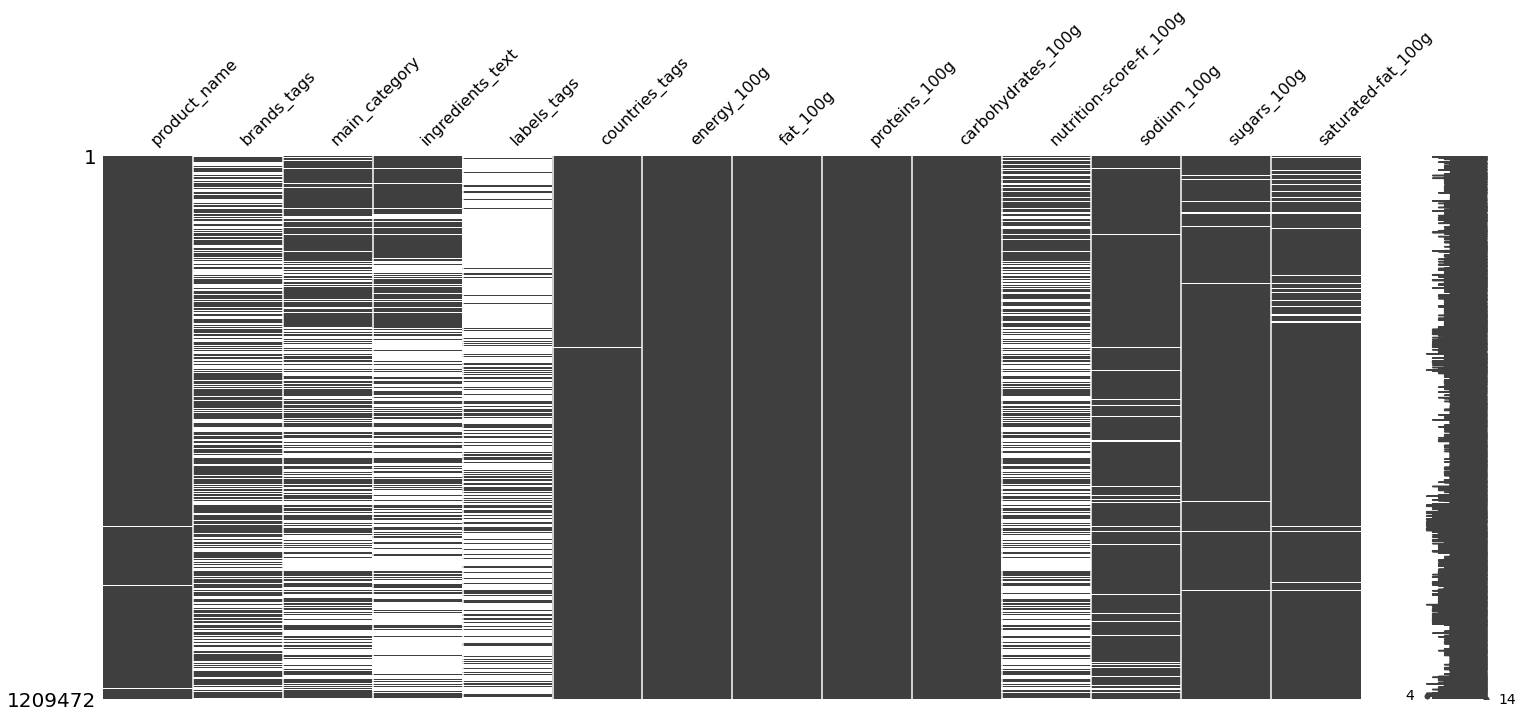

In [32]:
msno.matrix(df2_simp)

In [33]:
%%time
df2_simp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209472 entries, 0 to 1555489
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   product_name             1202826 non-null  object 
 1   brands_tags              711094 non-null   object 
 2   main_category            689094 non-null   object 
 3   ingredients_text         601564 non-null   object 
 4   labels_tags              295484 non-null   object 
 5   countries_tags           1207725 non-null  object 
 6   energy_100g              1208191 non-null  float64
 7   fat_100g                 1209472 non-null  float64
 8   proteins_100g            1209472 non-null  float64
 9   carbohydrates_100g       1209472 non-null  float64
 10  nutrition-score-fr_100g  608950 non-null   float64
 11  sodium_100g              1166555 non-null  float64
 12  sugars_100g              1185636 non-null  float64
 13  saturated-fat_100g       1159121 non-null 

In [34]:
608950 / df2_simp.shape[0]

0.5034841649910043

## NaN

### Product_name manquants

In [35]:
df2_simp.isna().sum()

product_name                 6646
brands_tags                498378
main_category              520378
ingredients_text           607908
labels_tags                913988
countries_tags               1747
energy_100g                  1281
fat_100g                        0
proteins_100g                   0
carbohydrates_100g              0
nutrition-score-fr_100g    600522
sodium_100g                 42917
sugars_100g                 23836
saturated-fat_100g          50351
dtype: int64

In [36]:
df2_simp.dropna(subset=['product_name'], inplace=True)

<ipython-input-36-f0f5542c5caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_simp.dropna(subset=['product_name'], inplace=True)


In [37]:
df2_simp.isna().sum()

product_name                    0
brands_tags                496891
main_category              516329
ingredients_text           603133
labels_tags                908851
countries_tags               1678
energy_100g                  1199
fat_100g                        0
proteins_100g                   0
carbohydrates_100g              0
nutrition-score-fr_100g    596146
sodium_100g                 40680
sugars_100g                 23438
saturated-fat_100g          48116
dtype: int64

In [38]:
df2_simp.dropna(subset=['sodium_100g', 'sugars_100g', 'saturated-fat_100g'], inplace=True)

<ipython-input-38-93c9afde7236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_simp.dropna(subset=['sodium_100g', 'sugars_100g', 'saturated-fat_100g'], inplace=True)


In [39]:
df2_simp.isna().sum()

product_name                    0
brands_tags                454036
main_category              480524
ingredients_text           566825
labels_tags                827967
countries_tags               1339
energy_100g                   849
fat_100g                        0
proteins_100g                   0
carbohydrates_100g              0
nutrition-score-fr_100g    504100
sodium_100g                     0
sugars_100g                     0
saturated-fat_100g              0
dtype: int64

In [41]:
df2_simp

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,en:france,1569.0,7.0,7.8,70.1,NaN,0.560,15.0,3.08
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,en:france,936.0,8.2,5.1,29.0,18.0,1.840,22.0,2.20
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,en:france,88.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00
6,Mini coco,NaN,NaN,NaN,NaN,en:france,251.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,en:france,134.0,0.3,0.9,5.3,1.0,0.168,3.9,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555482,Minis beignets,NaN,en:sweet-fritters,NaN,NaN,en:france,1393.0,20.2,7.4,30.9,15.0,0.440,10.4,6.00
1555483,Erdbeerkuchen 1019g tiefgefroren,coppenrath-wiese,de:tiefkühl-kuchen,"SAHNE (33%), Erdbeeren (12%), Zucker, WEIZENHM...",en:made-in-germany,en:germany,925.0,7.6,2.6,35.0,12.0,0.112,24.0,4.80
1555484,Steak haché pur boeuf,NaN,en:ground-beef-steaks,NaN,NaN,en:france,548.0,5.0,21.5,0.0,-2.0,0.072,0.0,2.30
1555486,Scs,NaN,NaN,NaN,NaN,en:united-kingdom,418.0,12.0,1.0,2.0,NaN,0.400,1.0,1.00


In [43]:
df2_simp['energy_100g'] = df2_simp['fat_100g'] * 37 + df2_simp['proteins_100g'] * 17 + df2_simp['carbohydrates_100g'] * 17

<ipython-input-43-bc8184d83d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_simp['energy_100g'] = df2_simp['fat_100g'] * 37 + df2_simp['proteins_100g'] * 17 + df2_simp['carbohydrates_100g'] * 17


In [44]:
df2_simp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110702 entries, 0 to 1555489
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   product_name             1110702 non-null  object 
 1   brands_tags              656666 non-null   object 
 2   main_category            630178 non-null   object 
 3   ingredients_text         543877 non-null   object 
 4   labels_tags              282735 non-null   object 
 5   countries_tags           1109363 non-null  object 
 6   energy_100g              1110702 non-null  float64
 7   fat_100g                 1110702 non-null  float64
 8   proteins_100g            1110702 non-null  float64
 9   carbohydrates_100g       1110702 non-null  float64
 10  nutrition-score-fr_100g  606602 non-null   float64
 11  sodium_100g              1110702 non-null  float64
 12  sugars_100g              1110702 non-null  float64
 13  saturated-fat_100g       1110702 non-null 

## variable catégorielle

In [45]:
for x in ['product_name', 'brands_tags', 'main_category', 'labels_tags', 'countries_tags']:
    print(len(df2_simp[x].unique()))

755299
82262
19887
42736
2736


In [46]:
df2[df2.countries_tags.str.contains(',')== True]['countries_tags']

179         en:france,en:united-states
217         en:france,en:united-states
252         en:france,en:united-states
262         en:france,en:united-states
384               en:belgium,en:france
                      ...             
1553702    en:france,en:united-kingdom
1553918          en:germany,en:ireland
1555026          en:germany,en:ireland
1555329           en:france,en:reunion
1555414          en:germany,en:ireland
Name: countries_tags, Length: 65470, dtype: object

In [47]:
df2_simp = df2_simp.copy()
index = df2_simp[df2_simp.countries_tags.str.contains(',')== True].index
df2_simp.drop(index=index, inplace=True)

In [48]:
df2_simp['countries_tags'] = df2_simp.countries_tags.str.replace('en:', '')

In [49]:
df2_simp.describe()

,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
count,1.050117e+06,1.050117e+06,1.050117e+06,1.050117e+06,561071.000000,1.050117e+06,1.050117e+06,1.050117e+06
mean,1.132320e+03,1.348280e+01,8.988466e+00,2.827365e+01,9.104604,5.117964e-01,1.317380e+01,5.066200e+00
std,7.430600e+02,1.593841e+01,9.765728e+00,2.770129e+01,8.897487,1.794449e+00,1.918373e+01,7.338932e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643800e+02,1.060000e+00,2.000000e+00,3.600000e+00,1.000000,4.000000e-02,7.000000e-01,1.000000e-01
50%,1.099500e+03,7.700000e+00,6.300000e+00,1.600000e+01,10.000000,2.420000e-01,3.570000e+00,1.960000e+00
75%,1.674500e+03,2.160000e+01,1.300000e+01,5.300000e+01,16.000000,5.600000e-01,1.860000e+01,7.140000e+00
max,3.700000e+03,1.000000e+02,1.000000e+02,1.000000e+02,40.000000,1.000000e+02,1.000000e+02,1.000000e+02


In [50]:
index = df2_simp[df2_simp.countries_tags.str.contains(':')== True].index
df2_simp.drop(index=index, inplace=True)

In [51]:
df2_simp.shape

(1050105, 14)

In [52]:
df2_simp.head()

,product_name,brands_tags,main_category,ingredients_text,labels_tags,countries_tags,energy_100g,fat_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,sodium_100g,sugars_100g,saturated-fat_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,france,1583.3,7.0,7.8,70.1,NaN,0.560,15.0,3.08
3,moutarde au moût de raisin,courte-paille,en:mustards,eau graines de téguments de moutarde vinaigre ...,fr:delois-france,france,883.1,8.2,5.1,29.0,18.0,1.840,22.0,2.20
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,france,85.0,0.0,0.2,4.8,NaN,0.816,0.4,0.00
6,Mini coco,NaN,NaN,NaN,NaN,france,315.0,3.0,2.0,10.0,NaN,0.460,3.0,1.00
13,Salade de carottes râpées,NaN,en:seasoned-shredded-carrots,NaN,NaN,france,116.5,0.3,0.9,5.3,1.0,0.168,3.9,0.10


## Valeurs dupliquées 

In [53]:
print(df2_simp.duplicated().sum())

29824


In [54]:
df2_simp.columns

Index(['product_name', 'brands_tags', 'main_category', 'ingredients_text',
       'labels_tags', 'countries_tags', 'energy_100g', 'fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g', 'saturated-fat_100g'],
      dtype='object')

In [55]:
print(df2_simp.duplicated(subset=['product_name','fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g']).sum())

66636


In [56]:
df2_simp.duplicated(subset=['product_name','fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g']).sum() / df2.shape[0]

0.055095115885278864

In [57]:
df2_simp = df2_simp.drop_duplicates(subset=['product_name','fat_100g',
       'proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g',
       'sodium_100g', 'sugars_100g'])

In [58]:
df2_simp.shape

(983469, 14)

## Export

In [59]:
df2_simp.to_csv('products.csv')